In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw_kernels import SVR, RBF, Polynomial, \
    KernelizedRidgeRegression
from sklearn.preprocessing import StandardScaler

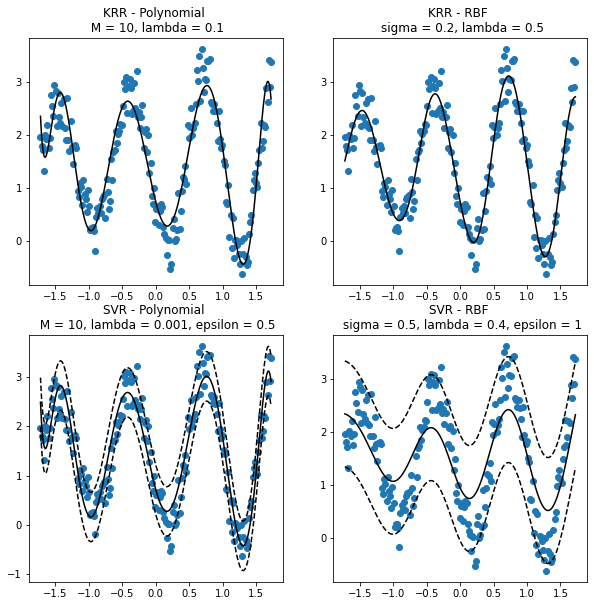

In [58]:
df = pd.read_csv("sine.csv")

X = df[["x"]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.transpose(df[["y"]].values)[0]

X_pred = np.transpose([np.linspace(np.min(X), np.max(X), 1000)])

figure, axis = plt.subplots(2, 2, figsize=(10,10))

axis[0,0].scatter(X, y, label="Original")
krr_p = KernelizedRidgeRegression(kernel=Polynomial(M = 10), lambda_=0.1)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X_pred)
axis[0,0].plot(X_pred, y_kkr, "black", label="KRR - Polynomial")
axis[0,0].set_title("KRR - Polynomial \n M = 10, lambda = 0.1")


axis[0,1].scatter(X, y, label="Original")
krr_p = KernelizedRidgeRegression(kernel=RBF(sigma = 0.2), lambda_=0.5)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X_pred)
axis[0,1].plot(X_pred, y_kkr, "black", label = "KRR - RBF")
axis[0,1].set_title("KRR - RBF \n sigma = 0.2, lambda = 0.5")

axis[1,0].scatter(X, y, label="Original")
krr_p = SVR(kernel=Polynomial(M = 10), lambda_=0.001, epsilon=0.5)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X_pred)
axis[1,0].plot(X_pred, y_kkr, "black", label = "SVR - Polynomial")
axis[1,0].plot(X_pred, y_kkr + 0.5, "k--")
axis[1,0].plot(X_pred, y_kkr - 0.5, "k--")
axis[1,0].set_title("SVR - Polynomial \n M = 10, lambda = 0.001, epsilon = 0.5")

axis[1,1].scatter(X, y, label="Original")
krr_p = SVR(kernel=RBF(sigma = 0.5), lambda_=0.4, epsilon=1)
krr_p.fit(X, y)
y_kkr = krr_p.predict(X_pred)
axis[1,1].plot(X_pred, y_kkr, "black", label = "SVR - RBF")
axis[1,1].plot(X_pred, y_kkr + 1, "k--")
axis[1,1].plot(X_pred, y_kkr - 1, "k--")
axis[1,1].set_title("SVR - RBF \n sigma = 0.5, lambda = 0.4, epsilon = 1")
plt.show()